In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [3]:
ds = tfds.load('fashion_mnist' , split = 'train') #split to load which data i want to load

In [4]:
ds.as_numpy_iterator().next()['label']

2

In [5]:
import numpy as np #to do data transformation



In [6]:
dataiterator = ds.as_numpy_iterator()

In [7]:
#Getting data out of pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

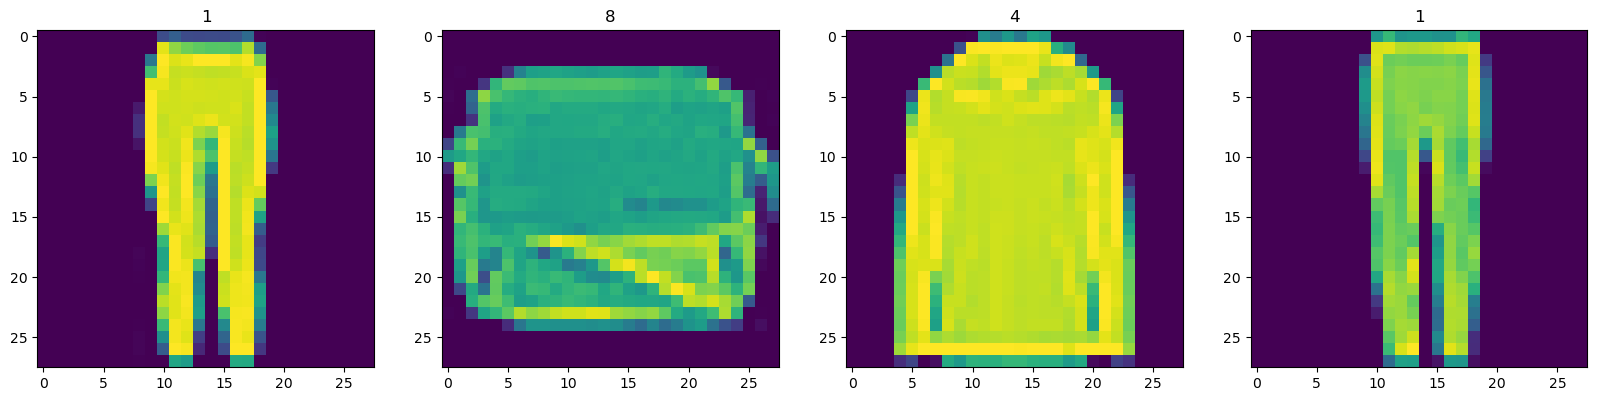

In [8]:
fig ,ax = plt.subplots(ncols = 4 , figsize = (20,20))
#loop 4 times and get  images
for idx in range(4):
    #grab an img and label
    sample = dataiterator.next() #.next is for new images
    #plot img using specific axis 
    ax[idx].imshow(np.squeeze(sample['image']))
    #squeeze bcoz it is in a set of sub arrays
    #Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])
    




In [9]:
def scale_images(data):  #taking data from tensorflow data pipeline 
    image = data['image'] #extract image only
    return image / 255 #scale img between 0,1

In [10]:
# map
# cache
# shuffle 
# batch
# prefetch

# steps to build data pipeline

In [11]:
ds = tfds.load('fashion_mnist' , split = 'train')
#Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
#Cache the dataset for that batch
ds = ds.cache()

#shuffle the dataset
ds = ds.shuffle(60000)

#Batch into 128 images per sample
ds = ds.batch(128)

#Reduces the likelyhood of bottlenecking
ds = ds.prefetch(64)


In [12]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Neural Network

In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D 

In [14]:
def build_generator():
    model = Sequential()
    #takes in random values and reshapes it 
    model.add(Dense (7*7*128 , input_dim = 128))
    # 128 random values avoid model collapse, referred to as latent space no of units i 7X7 
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128))) 
    
    #upsampling block 1
    model.add(UpSampling2D()) #doubles the size of output from previous layer  
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #upsampling Block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128 , 5 , padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Convolutional  block 1 
    model.add(Conv2D(128 , 4 , padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Convolutional block 2
    model.add(Conv2D(128 , 4 , padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #conv layer to get to 1 channel
    model.add(Conv2D(1,4 , padding = 'same' , activation = 'sigmoid'))
    #sigmoid so [0,1]
    
    
    return model

In [15]:
generator = build_generator()

C:\Users\Aditya Bankar\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
img = generator.predict(np.random.randn(4,128,1)) # 4 diff random images , 128 random values 
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


array([[[[0.49363068],
         [0.49269533],
         [0.4928398 ],
         ...,
         [0.4996049 ],
         [0.4967449 ],
         [0.5034507 ]],

        [[0.49405554],
         [0.49484447],
         [0.4932024 ],
         ...,
         [0.49518627],
         [0.49205536],
         [0.5000482 ]],

        [[0.4882545 ],
         [0.49661684],
         [0.50649387],
         ...,
         [0.4994899 ],
         [0.4957288 ],
         [0.4995481 ]],

        ...,

        [[0.498768  ],
         [0.4994204 ],
         [0.49566752],
         ...,
         [0.494578  ],
         [0.49824592],
         [0.50025743]],

        [[0.5045077 ],
         [0.50345314],
         [0.5040025 ],
         ...,
         [0.49715817],
         [0.5004756 ],
         [0.5000953 ]],

        [[0.5019955 ],
         [0.49966586],
         [0.49790844],
         ...,
         [0.49959838],
         [0.49933854],
         [0.5011138 ]]],


       [[[0.49260396],
         [0.49374446],
         [0.49

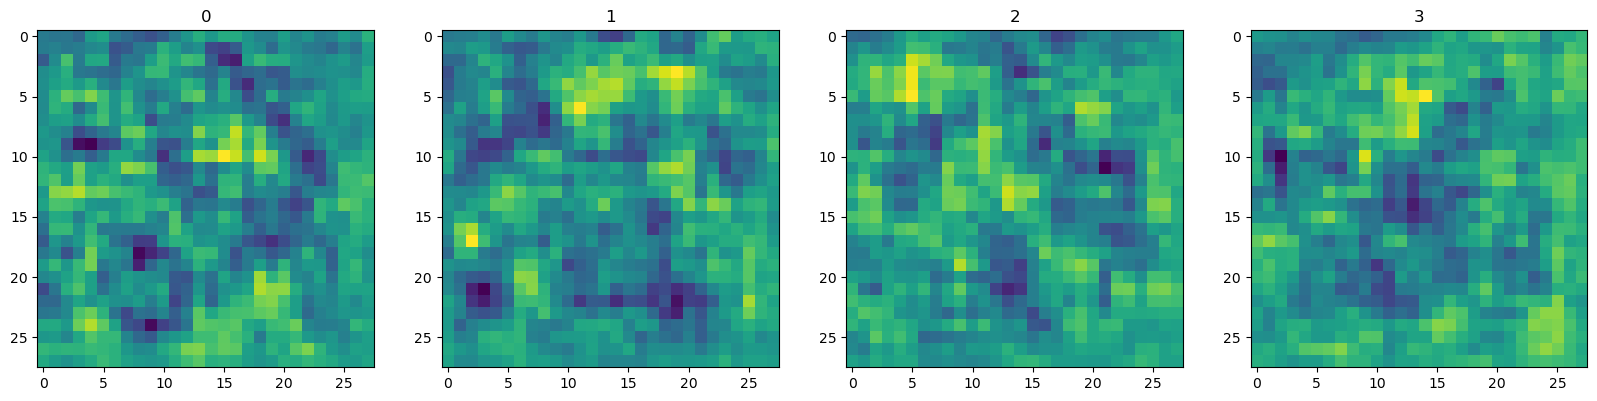

In [18]:
fig ,ax = plt.subplots(ncols = 4 , figsize = (20,20))
#loop 4 times and get  images
for idx,img in enumerate(img):
    #grab an img and label
    sample = dataiterator.next() #.next is for new images
    #plot img using specific axis 
    ax[idx].imshow(np.squeeze(img))
    #squeeze bcoz it is in a set of sub arrays
    #Appending the image label as the plot title 
    ax[idx].title.set_text(idx)
    

In [19]:
def build_discriminator():
    model  =  Sequential()
    
    #1st convo block
    model.add(Conv2D(32,5,input_shape = (28,28,1))) #32 filters shape is 5,5 
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4)) #0.4 is the strenght of the dropout
    
    #2nd convo block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #3rd convo block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #4th convo block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation ='sigmoid' ))
    #1 is false  img  0 is real img depends on model
    return model

In [20]:
discriminator = build_discriminator()

C:\Users\Aditya Bankar\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
discriminator.predict(np.expand_dims(img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


array([[0.49313274]], dtype=float32)

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
#binary crossentropy to be the loss for both 


In [29]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
#making slow so it doesn't learn to fast
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [30]:
#Importing the base model class to subclass out traning sset
from tensorflow.keras.models import Model

In [31]:
class FashionGAN(Model):
    def __init__(self , generator , discriminator , *args , **kwargs):
        super().__init__(*args , **kwargs)
        
        
        #Create attributes for gen and dis
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self , g_opt , d_opt , g_loss , d_loss , *args , **kwargs):
        #compile with base class
        super().compile(*args , **kwargs)
        
        #Create attributes for loss and optimizer
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self,batch):
        #get the data
        #batch of real images 
        real_images = batch
        #batch of fake images
        fake_images = self.generator(tf.random.normal((128,128,1)),training  = False)
        #false because we are making predictions
        
        #Train the discriminator
        with tf.GradientTape() as d_tape:
        #cal or monitoring each one of the fucntions
        #pass the real and fake images in dis 
            yhat_real = self.discriminator(real_images , training = True)
            yhat_fake = self.discriminator(fale_images , training = True)
            yhat_realfake = tf.concat([yhat_real , yhat_fake] , axis = 0)
        
            #Create the labels for fake and real images
            y_realfake = tf.concat([tf.zeros_like(yhat_real) , tf.ones_like(yhat_fake)] , axis = 0)
            
            
            #Add noise to the outputs
            #uniform distribution
            noise_real = 0.15*tf.randon.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.randon.uniform(tf.shape(yhat_fake))
            yhat_realfake += tf.concat([noise_real , noise_fake] , axis = 0)
            
            #Cal the loss
            total_d_loss = self.d_loss(y_realfake , yhat_realfake)
            #Apply backpropogation
        dgrad = d_tape.gradient(total_d_loss , self.discriminator.trainable_variables)
        #cal gradient for each one of the trainable variables
        self.d_opt.apply_gradient(zip(dgrad , self.discriminator.trainable_variables))   

        #train the generator
        with tf.GradientTape() as g_tape:
            #generate new images
            gen_images = selg.generator(tf.random.normal((128,128,1) , training = True))
            #create the predicted labels
            predicted_labels = self.discriminator(gen_images , training = False)

            #cal loss
            
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels) , predicted_labels)
            #apply that generated img are real images so we reward the generator for faking the discriminator
            #i.e discriminator predicts that a genrated image is real

        #Backpropagation 
        ggrad = g_tape.gradient(total_g_loss , self.generator.trainable_variables)
        self.g_opt.apply_gradient(zip(ggrad , self.generator.trainable_variables))
        
        
        return {"d_loss":total_d_loss , "g_loss":total_g_loss}
    

In [32]:
#create instance of the subclassed model
fashgan = FashionGAN(generator , discriminator)

In [33]:
fashgan.compile(g_opt , d_opt , g_loss , d_loss)

Callback

In [34]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [36]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128): #latent dim is just random values passing to the genrator to generate random image 
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))
        